In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/0rame/Desktop/ML_tutorials/Datas/breast-cancer-wisconsin (2).data",header=None)

In [3]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df[6].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [7]:
df[6].value_counts()

6
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [8]:
import numpy as np

In [10]:
df[6].replace('?',np.nan,inplace=True)

In [11]:
x = df.drop([6,10],axis=1)

In [12]:
y_raw = df[10].values

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()

In [15]:
y = label_encoder.fit_transform(y_raw)

In [22]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=50)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
penalty = ['l1','l2']
c_val = 2.**np.arange(-5,10,step=2)

In [20]:
grid_search = [{'C':c_val,'penalty':penalty}]

In [21]:
model = LogisticRegression(solver='liblinear')

In [23]:
cv_log = GridSearchCV(estimator=model,param_grid=grid_search)

In [24]:
cv_log.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([3.125e-02, 1.250e-01, 5.000e-01, 2.000e+00, 8.000e+00, 3.200e+01,
       1.280e+02, 5.120e+02]),
                          'penalty': ['l1', 'l2']}])

In [25]:
best_c = cv_log.best_params_['C']
best_penalty = cv_log.best_params_['penalty']

In [26]:
best_c

8.0

In [27]:
best_penalty

'l1'

In [31]:
model = LogisticRegression(solver='liblinear',C=best_c,penalty=best_penalty)

In [32]:
model.fit(xtrain,ytrain)

LogisticRegression(C=8.0, penalty='l1', solver='liblinear')

In [34]:
prediction = model.predict(xtest)

In [35]:
y_prob = model.predict_proba(xtest)

In [36]:
ytest

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [37]:
prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [38]:
y_prob

array([[9.85115649e-01, 1.48843511e-02],
       [9.97127969e-01, 2.87203082e-03],
       [9.67276983e-01, 3.27230172e-02],
       [3.86280653e-01, 6.13719347e-01],
       [9.71671383e-01, 2.83286170e-02],
       [3.74464256e-03, 9.96255357e-01],
       [9.38514109e-01, 6.14858906e-02],
       [9.84281642e-01, 1.57183575e-02],
       [9.91383836e-01, 8.61616428e-03],
       [9.92685076e-01, 7.31492418e-03],
       [6.82747497e-06, 9.99993173e-01],
       [9.22506829e-02, 9.07749317e-01],
       [3.29205521e-03, 9.96707945e-01],
       [1.10443416e-07, 9.99999890e-01],
       [9.82594208e-01, 1.74057921e-02],
       [9.97616532e-01, 2.38346813e-03],
       [9.96494210e-01, 3.50578993e-03],
       [9.52438007e-01, 4.75619927e-02],
       [6.71801352e-01, 3.28198648e-01],
       [9.78731609e-01, 2.12683906e-02],
       [2.43834675e-01, 7.56165325e-01],
       [9.95019805e-01, 4.98019488e-03],
       [9.97834686e-01, 2.16531449e-03],
       [1.54120454e-02, 9.84587955e-01],
       [9.956689

In [39]:
import matplotlib.pyplot as plt

In [40]:
from sklearn.metrics import roc_curve,auc

In [41]:
fpr,tpr,threshold = roc_curve(ytest,y_prob[:,1])

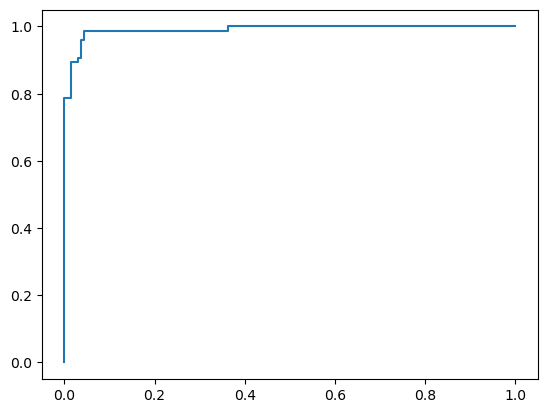

In [42]:
plt.plot(fpr,tpr)

In [43]:
plt.show()

In [44]:
print(auc(fpr,tpr))

0.9900246913580247
